<a href="https://colab.research.google.com/github/markzaldivar/MAT422/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

Given the input data is of the form $\left\{\left(\alpha_{i}, b_{i}\right): i=1, \ldots, n\right\}$ where $\alpha_{i} \in \mathbb{R}^{d}$ are the features and $b_{i} \in\{0,1\}$ is the label. As before we use a matrix representation: $A \in \mathbb{R}^{n \times d}$ has rows $\alpha_{j}^{T}, j=1, \ldots, n$ and $\mathbf{b}=\left(b_{1}, \ldots, b_{n}\right)^{T} \in\{0,1\}^{n}$. We wish to find a function of the features that approximates the probability of the label 1. For this purpose, we model the logit function of the probability of label 1 as a linear function of the features.

For $\mathbf{x}, \alpha \in \mathbb{R}^{d}$, let $p(\alpha ; \mathbf{x})$ be the probability of the output to be 1 , we define


$$
\log \frac{p(\alpha ; \mathbf{x})}{1-p(\alpha ; \mathbf{x})}=\alpha^{T} \mathbf{x}
$$
Here $\alpha^{T} \mathbf{x}=\sum x_{i} \alpha_{i}$ can be viewed as a regression problem which seeks the best parameters ( $\mathbf{x}$ ) with given data $(\alpha)$. Rearranging this expression gives
$$
p(\alpha ; \mathbf{x})=\sigma\left(\alpha^{T} \mathbf{x}\right)
$$
where the sigmoid function is
$$
\sigma(t)=\frac{1}{1+e^{-t}}
$$
for $t \in \mathbb{R}$. To maximize the likelihood of the data, we assume the labels are independent given the features, which is given by
$$
\mathscr{L}(\mathbf{x} ; A, \mathbf{b})=\prod_{i=1}^{n} p\left(\alpha_{i} ; \mathbf{x}\right)^{b_{i}}\left(1-p\left(\alpha_{i} ; \mathbf{x}\right)\right)^{1-b_{i}}
$$
Taking a logarithm, multiplying by $-1 / n$ and substituting the sigmoid function, we want to minimize the cross-entropy loss.
$$
\ell(\mathbf{x} ; A, \mathbf{b})=-\frac{1}{n} \sum_{i=1}^{n} b_{i} \log \left(\sigma\left(\alpha^{T} \mathbf{x}\right)\right)-\frac{1}{n} \sum_{i=1}^{n}\left(1-b_{i}\right) \log \left(1-\sigma\left(\alpha^{T} \mathbf{x}\right)\right)
$$
That is, we solve
$$
\min _{\mathbf{x} \in \mathbb{R}^{d}} \ell(\mathbf{x} ; A, \mathbf{b})
$$
To use gradient descent, we need to compute the gradient of $\ell$. We use the Chain Rule and first compute the derivative of $\sigma$ which is
$$
\sigma^{\prime}(t)=\frac{e^{-t}}{\left(1+e^{-t}\right)^{2}}=\frac{1}{1+e^{-t}}\left(1-\frac{1}{1+e^{-t}}\right)=\sigma(t)(1-\sigma(t))
$$

It follows that $\sigma(t)$ satisfies the logistic differential equation. It arises in a variety of applications, including the modeling of population dynamics. Here it will be a convenient way to compute the gradient. Indeed observe that by the Chain Rule
$$
\nabla_{\mathbf{x}} \sigma\left(\alpha^{T} \mathbf{x}\right)=\sigma\left(\alpha^{T} \mathbf{x}\right)\left(1-\sigma\left(\alpha^{T} \mathbf{x}\right)\right) \alpha
$$
where we use a subscript $\mathbf{x}$ to make it clear that the gradient is with respect to $\mathbf{x}$.
With the same approach, we have
$$
\begin{aligned}
\nabla_{\mathbf{x}} \ell(\mathbf{x} ; A, \mathbf{b}) &=-\frac{1}{n} \sum_{i=1}^{n} \frac{b_{i}}{\sigma\left(\alpha_{i}^{T} \mathbf{x}\right)} \nabla_{\mathbf{x}} \sigma\left(\alpha_{i}^{T} \mathbf{x}\right)+\frac{1}{n} \sum_{i=1}^{n} \frac{1-b_{i}}{1-\sigma\left(\alpha_{i}^{T} \mathbf{x}\right)} \nabla_{\mathbf{x}} \sigma\left(\alpha_{i}^{T} \mathbf{x}\right) \\
&=-\frac{1}{n} \sum_{i=1}^{n}\left(\frac{b_{i}}{\sigma\left(\alpha_{i}^{T} \mathbf{x}\right)}-\frac{1-b_{i}}{1-\sigma\left(\alpha_{i}^{T} \mathbf{x}\right)}\right) \sigma\left(\alpha_{i}^{T} \mathbf{x}\right)\left(1-\sigma\left(\alpha_{i}^{T} \mathbf{x}\right)\right) \alpha_{i} \\
&=-\frac{1}{n} \sum_{i=1}^{n}\left(b_{i}-\sigma\left(\alpha_{i}^{T} \mathbf{x}\right)\right) \alpha_{i}
\end{aligned}
$$
To compute the Hessian, we note that
$$
\nabla_{\mathbf{x}}\left(\sigma\left(\alpha^{T} \mathbf{x}\right) \alpha_{j}\right)=\sigma\left(\alpha^{T} \mathbf{x}\right)\left(1-\sigma\left(\alpha^{T} \mathbf{x}\right)\right) \alpha \alpha_{j}
$$
so that
$$
\nabla_{\mathbf{x}}\left(\sigma\left(\alpha^{T} \mathbf{x}\right) \alpha\right)=\sigma\left(\alpha^{T} \mathbf{x}\right)\left(1-\sigma\left(\alpha^{T} \mathbf{x}\right)\right) \alpha \alpha^{T}
$$
Thus
$$
\nabla_{\mathbf{x}}^{2} \ell(\mathbf{x} ; A, \mathbf{b})=\frac{1}{n} \sum_{i=1}^{n} \sigma\left(\alpha_{i}^{T} \mathbf{x}\right)\left(1-\sigma\left(\alpha_{i}^{T} \mathbf{x}\right)\right) \alpha_{i} \alpha_{i}^{T}
$$
where $\nabla_{\mathbf{x}}^{2}$ indicates the Hessian with respect to the $\mathbf{x}$ variables. Now each $\alpha_{i} \alpha_{i}^{T}$ is a symmetric matrix and PSD. As a result, the function $\ell(\mathbf{x} ; A, \mathbf{b})$ is convex as a function of $\mathbf{x} \in \mathbb{R}^{d}$. We want to comment that convexity is one reason for working with the cross-entropy loss rather than the mean squared error.

To update iteration formula: for step size $\beta$, one step of gradient descent is therefore
$$
\mathbf{x}^{k+1}=\mathbf{x}^{k}+\beta \frac{1}{n} \sum_{i=1}^{n}\left(b_{i}-\sigma\left(\alpha_{i}^{T} \mathbf{x}^{k}\right)\right) \alpha_{i}
$$
In stochastic gradient descent, a variant of gradient descent, we pick a sample $I$ uniformly at random in $\{1, \ldots, n\}$ and update as follows
$$
\mathbf{x}^{k+1}=\mathbf{x}^{k}+\beta\left(b_{I}-\sigma\left(\alpha_{I}^{T} \mathbf{x}^{k}\right)\right) \alpha_{I}
$$

## Python Implementation

We can apply logistic regression in Python through the scikit-learn library. We begin by generating binary classification data and training a logistic regression model on this data. Through this training, the model learns which parameters minimize the difference between actual and predicted values. This is done via maximum likelihood estimation.

Note that in this implementation, the Python library uses binary cross-entropy as the cost function and an optimization technique called limited-memory BFGS as opposed to the gradient descent described above.

We then input the data to the sigmoid function which maps the data to a probabilty between 0 and 1. This probabilty along with a decision boundary (in this case 0.5) determines the classification of the data as either 0 or 1.

The results are displayed below.

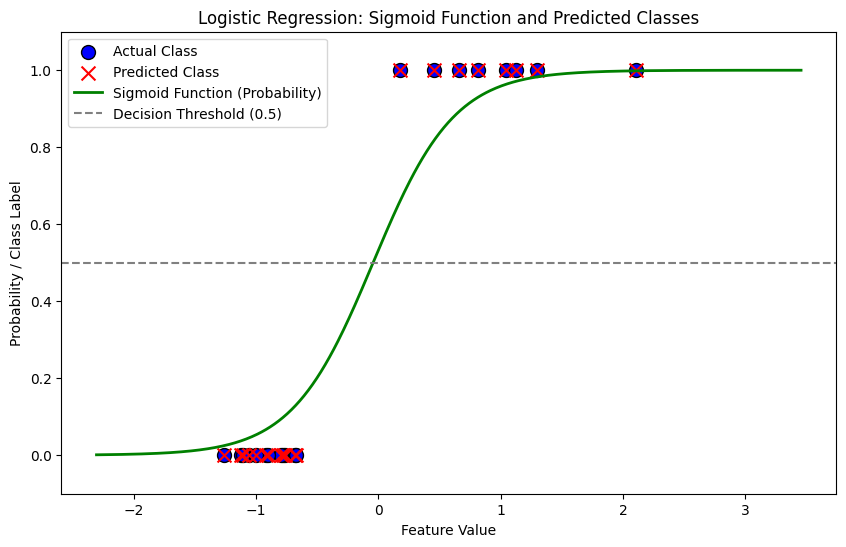

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Generate synthetic binary classification data
X, y = make_classification(n_samples=100, n_features=1, n_informative=1,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Generate a range of values for the sigmoid function plot
x_values = np.linspace(X.min() - 1, X.max() + 1, 500)
z = model.coef_[0] * x_values + model.intercept_
sigmoid_curve = 1 / (1 + np.exp(-z))  # Sigmoid function

# Predict the class labels for the test data
y_pred = model.predict(X_test)

# Plot the data points, predicted labels, and the sigmoid function
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Class', marker='o', s=100, edgecolor='k')
plt.scatter(X_test, y_pred, color='red', label='Predicted Class', marker='x', s=100)
plt.plot(x_values, sigmoid_curve, color='green', label='Sigmoid Function (Probability)', linewidth=2)
plt.axhline(0.5, color='gray', linestyle='--', label='Decision Threshold (0.5)')

# Set plot labels and title
plt.xlabel("Feature Value")
plt.ylabel("Probability / Class Label")
plt.title("Logistic Regression: Sigmoid Function and Predicted Classes")
plt.legend()
plt.ylim(-0.1, 1.1)  # Limit y-axis for clarity
plt.show()
